In [3]:
!pip install tensorflow-text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.9 MB 30.7 MB/s 
     |████████████████████████████████| 578.0 MB 17 kB/s 
     |████████████████████████████████| 5.9 MB 66.0 MB/s 
     |████████████████████████████████| 438 kB 70.4 MB/s 
     |████████████████████████████████| 1.7 MB 57.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.

In [1]:
import imblearn
import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import tensorflow_hub as hub
import tensorflow_text as text

In [5]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [2]:
msg = pd.read_csv('train_E6oV3lV.csv')

In [ ]:
df_test0=msg[msg["label"]==0]
df_test1=msg[msg["label"]==1]

In [ ]:
df_test0=df_test0.iloc[0:1000,]
df_test1=df_test1.iloc[0:1000,]

In [ ]:
msg=msg.drop(df_test0.index)
msg=msg.drop(df_test1.index)

In [ ]:
test=pd.concat([df_test0,df_test1])

In [ ]:
msg.reset_index(drop=True)

In [3]:
lemmatizer= WordNetLemmatizer()

In [8]:
corpus1=[]
for i in range(len(msg)):
    review=re.sub('[^a-zA-z]', ' ',msg['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus1.append(review)

In [ ]:
corpus2=[]
for i in range(len(test)):
    review=re.sub('[^a-zA-z]', ' ',test['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus2.append(review)

In [20]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.0 MB/s 
     |████████████████████████████████| 5.3 MB 56.7 MB/s 
     |████████████████████████████████| 1.3 MB 50.1 MB/s 
     |████████████████████████████████| 163 kB 65.3 MB/s 
     |████████████████████████████████| 7.6 MB 58.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=05b267ba9115d5fdec1070774a812d299480a140b9c23cfffce26eafcbd7b37b
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [27]:
texttransform=sbert_model.encode(corpus1)
testtransform=sbert_model.encode(corpus2)

In [29]:
texttransform,texttransform.shape

(array([[-0.09500442,  0.71342236,  1.2494334 , ..., -0.2223369 ,
         -0.07193374, -0.21106821],
        [-0.16634293,  0.8761325 ,  0.71772707, ...,  0.21616894,
         -0.2974473 , -0.23691563],
        [ 0.31051788,  0.5023331 ,  1.8010316 , ..., -0.36084792,
         -0.42048064,  0.18790369],
        ...,
        [-0.3067392 ,  0.0573852 ,  0.86585164, ...,  0.8549492 ,
          0.34021938, -0.22528496],
        [ 0.8393795 ,  1.5611218 ,  0.46583265, ..., -0.60814464,
          0.03173727,  0.01085649],
        [-0.02149174,  0.3652342 ,  2.6983974 , ...,  0.3282586 ,
         -0.73569286,  0.13699596]], dtype=float32), (31962, 768))

In [30]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X, y = sm.fit_resample(texttransform, msg['label'])

In [33]:
X.shape,y.shape

((59440, 768), (59440,))

In [34]:
y.value_counts()

0    29720
1    29720
Name: label, dtype: int64

In [38]:
from keras.models import Sequential
from keras.layers import Dense
classifier=Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 768))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X, y, batch_size = 10, epochs = 10)

Epoch 1/10
4756/4756 [==============================] - 15s 3ms/step - loss: 0.3040 - accuracy: 0.8775
Epoch 2/10
4756/4756 [==============================] - 14s 3ms/step - loss: 0.2509 - accuracy: 0.8998
Epoch 3/10
4756/4756 [==============================] - 17s 4ms/step - loss: 0.2322 - accuracy: 0.9059
Epoch 4/10
4756/4756 [==============================] - 15s 3ms/step - loss: 0.2176 - accuracy: 0.9106
Epoch 5/10
4756/4756 [==============================] - 15s 3ms/step - loss: 0.2059 - accuracy: 0.9175
Epoch 6/10
4756/4756 [==============================] - 14s 3ms/step - loss: 0.1972 - accuracy: 0.9214
Epoch 7/10
4756/4756 [==============================] - 18s 4ms/step - loss: 0.1855 - accuracy: 0.9260
Epoch 8/10
4756/4756 [==============================] - 16s 3ms/step - loss: 0.1795 - accuracy: 0.9293
Epoch 9/10
4756/4756 [==============================] - 16s 3ms/step - loss: 0.1724 - accuracy: 0.9337
Epoch 10/10
4756/4756 [==============================] - 19s 4ms/step - l

In [39]:
y_pred = classifier.predict(testtransform)
y_pred = (y_pred > 0.5)
from sklearn.metrics import classification_report
print(classification_report(test["label"],y_pred))

372/372 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      5876
           1       0.92      0.94      0.93      6012

    accuracy                           0.93     11888
   macro avg       0.93      0.93      0.93     11888
weighted avg       0.93      0.93      0.93     11888



Text(0.5, 15.0, 'Predicted label')

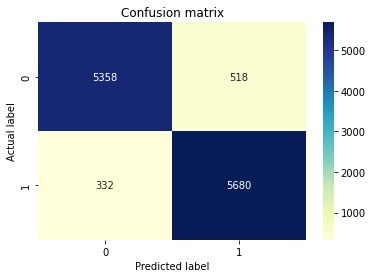

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [107]:

sentence='no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins'

s1=sbert_model.encode(sentence)



In [120]:
sentence='U r bad charactered hateful bigot'
review=re.sub('[^a-zA-z]', ' ',sentence)
review=review.lower()
review=review.split()
review=[lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
review=' '.join(review)
review= [review]
s1=sbert_model.encode(review)
s1

array([[-1.95582733e-02,  3.87708783e-01,  5.96862435e-01,
         1.88484237e-01, -6.80646062e-01,  5.63389778e-01,
         1.76320505e+00,  4.50257123e-01,  3.87949646e-01,
        -1.95864066e-01, -1.01950657e+00,  1.51478052e-01,
        -1.08213611e-02,  6.49362504e-01,  7.61915743e-01,
         6.64016247e-01, -2.98036128e-01, -8.43151450e-01,
        -3.82940114e-01, -3.78985107e-01, -1.25275373e-01,
        -5.50395727e-01,  6.14823759e-01, -6.99521303e-01,
         1.77259907e-01,  2.86527485e-01,  2.98134238e-01,
        -6.64667308e-01, -1.56549084e+00,  2.10749000e-01,
         1.65383473e-01, -3.86435002e-01,  5.00046968e-01,
         4.23112363e-02, -3.96376044e-01,  1.19149303e+00,
         4.37578976e-01, -7.10742950e-01,  2.14009181e-01,
         1.17049448e-01,  1.46508288e+00,  3.62656295e-01,
         2.53582317e-02,  3.67401242e-01, -2.51726154e-02,
        -1.92139521e-01,  8.74193728e-01,  7.72967860e-02,
         6.77564859e-01, -3.44571322e-01, -3.82056832e-0

In [101]:

X_test[0].shape,s1.shape

((768,), (1, 768))

In [121]:
classifier.predict(s1)


1/1 [==============================] - 0s 17ms/step


array([[0.92368376]], dtype=float32)